## **About Dataset**
* This dataset encompasses non-identifying information about every user who has ever created an account on Excelerate.

* The data is comprehensive, covering all users, regardless of their engagement with specific opportunities.

* Each row represents a unique user, and the dataset provides a holistic view of the user base.
## **Data Summary**

| **Column**             | **Description**                           | **Non-Null Count** | **Data Type** |
|-----------------------|-------------------------------------------|---------------------|----------------|
| PreferredSponsors      | The sponsors preferred by users           | 27,562              | Object         |
| Gender                 | User's gender (e.g., Male, Female)       | 18,027              | Object         |
| Country                | Country of residence                       | 27,500              | Object         |
| Degree                 | Highest degree attained                    | 16,750              | Object         |
| Sign Up Date          | Date when the user created an account     | 27,562              | Object         |
| City                   | City of residence                          | 18,028              | Object         |
| ZIP Code               | Postal code of user's residence            | 18,018              | Object         |
| From Social Media      | Indicates whether the user signed up via social media (True/False) | 27,553 | Object         |

### **Observations**
- The dataset includes **27,562 users**.
- Most columns have missing values, particularly **Gender**, **Degree**, **City**, and **ZIP Code**.
- The data is primarily categorical, stored as objects.

## **Let's Begin by Importing the Required Libraries**

In [122]:
# For numerical computing
import numpy as np
# For manipulation data
import pandas as pd
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# import warnings
import warnings
warnings.filterwarnings("ignore")

## **Import the data**

In [123]:
df = pd.read_csv("./dataset/UserData.csv")

# to set full display
pd.set_option('display.max_columns', None)
# Display data
df.head()

,PreferredSponsors,Gender,Country,Degree,Sign Up Date,city,zip,isFromSocialMedia
0,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Male,Nigeria,Undergraduate Student,2023-07-23T08:05:58.602Z,Owerri,460103,False
1,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Male,India,Undergraduate Student,2023-04-24T09:57:07.405Z,kottayam,686501,False
2,"[""GlobalShala"",""Illinois Institute of Technolo...",NaN,India,NaN,2022-10-14T17:13:36.303Z,NaN,NaN,False
3,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",NaN,Albania,NaN,2023-06-06T12:29:01.772Z,NaN,NaN,True
4,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Female,Ghana,Not in Education,2023-06-15T16:31:42.719Z,Kumasi,AT-1214-9090,False


In [124]:
# info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27562 entries, 0 to 27561
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   PreferredSponsors  27562 non-null  object
 1   Gender             18027 non-null  object
 2   Country            27500 non-null  object
 3   Degree             16750 non-null  object
 4   Sign Up Date       27562 non-null  object
 5   city               18028 non-null  object
 6   zip                18018 non-null  object
 7   isFromSocialMedia  27553 non-null  object
dtypes: object(8)
memory usage: 1.7+ MB


In [125]:
# statistical summary of the data
df.describe()

,PreferredSponsors,Gender,Country,Degree,Sign Up Date,city,zip,isFromSocialMedia
count,27562,18027,27500,16750,27562,18028,18018,27553
unique,94,4,169,4,27561,4727,7453,2
top,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Male,India,Undergraduate Student,2022-10-30T17:25:54.072Z,Hyderabad,63108,True
freq,22011,11027,11893,6527,2,743,629,13811


* As our Data is Categorical, therefore descriptive statistics will not be useful here.

### **Check for Missing Values**

In [126]:
df.isnull().sum() # Counts of missing values per column

PreferredSponsors        0
Gender                9535
Country                 62
Degree               10812
Sign Up Date             0
city                  9534
zip                   9544
isFromSocialMedia        9
dtype: int64

### **Exploration/Inspection of Data Column by Column**

In [127]:
# columns names
df.columns

Index(['PreferredSponsors', 'Gender', 'Country', 'Degree', 'Sign Up Date',
       'city', 'zip', 'isFromSocialMedia'],
      dtype='object')

### **1. PreferredSponsors**

In [128]:
print('Total number of missing values in PreferredSponsors column:', df['PreferredSponsors'].isnull().sum())

Total number of missing values in PreferredSponsors column: 0


In [129]:
# Number of unique values 
no_of_unique_in_PS= df['PreferredSponsors'].nunique()
print("Number of unique values in PreferredSponsors: ", no_of_unique_in_PS)

Number of unique values in PreferredSponsors:  94


In [130]:
#The top 5 PreferredSponsors
top_five_PS = df['PreferredSponsors'].value_counts().nlargest(5)

# Create a pie chart
fig = px.pie(values=top_five_PS.values, names=top_five_PS.index, title='Top 5 Preferred Sponsors')
fig.show()

* As we can see according to this data almost 85% of the users Preferred Sponsors are `GlobalShala , Grant Thornton, Saint Louis University, Illinios Institute of Technology, and Excelerate.`

### **2. Gender**

In [131]:
# Total number of entries in the dataset
total_entries = df.shape[0]

# Total number of missing values in the Gender column
missing_gender = df["Gender"].isnull().sum()

# Calculate the percentage of missing values
percentage_missing_gender = round((missing_gender / total_entries) * 100, 2)

# Print the result
print('Total number of missing values:', missing_gender)
print('Percentage of missing values in Gender:', percentage_missing_gender)

Total number of missing values: 9535
Percentage of missing values in Gender: 34.59


In [132]:
# Unique values in Gender column
df["Gender"].unique()

array(['Male', nan, 'Female', 'Other', "Don't want to specify"],
      dtype=object)

In [133]:
# value counts of Gender
df['Gender'].value_counts()

Gender
Male                     11027
Female                    6910
Don't want to specify       75
Other                       15
Name: count, dtype: int64

In [134]:
# Impute missing values in Gender column with "Not specified"
df['Gender'].fillna('Not specified', inplace=True)

# Verify the imputation
print('Total number of missing values in Gender after imputation:', df['Gender'].isnull().sum())

Total number of missing values in Gender after imputation: 0


In [135]:
df['Gender'].value_counts()

Gender
Male                     11027
Not specified             9535
Female                    6910
Don't want to specify       75
Other                       15
Name: count, dtype: int64

* I chose not to use any imputation techniques for the missing values in the `Gender` column. Instead, I replaced the missing values with `Not Specified`" to retain the originality of the data and avoid manipulation. If I had opted to impute the missing values, the mode of the column would have been used, which is `Male`, as it is the most frequent category. This decision allows me to maintain the integrity of the dataset and ensures that the analysis reflects the true distribution of responses.

In [136]:
# Calculate the percentage of each gender
gender_counts = df['Gender'].value_counts(dropna=False)
gender_percentages = (gender_counts / total_entries) * 100

# Round the gender percentages to 1 decimal place
gender_percentages_rounded = gender_percentages.round(1)

# Create a bar plot using plotly
fig = px.bar(x=gender_percentages_rounded.index.astype(str), y=gender_percentages_rounded.values, 
             labels={'x': 'Gender', 'y': 'Percentage (%)'}, 
             title='Percentage of Gender Distribution (Including NaN)',
             text=[f'{val}%' for val in gender_percentages_rounded.values],
             color=gender_percentages_rounded.index.astype(str))

# layout for better visualization
fig.update_layout(xaxis_title='Gender', yaxis_title='Percentage (%)', yaxis_range=[0, 100], legend_title_text='')
fig.show()

### **3. Country**

In [137]:
df['Country'].head(10)

0          Nigeria
1            India
2            India
3          Albania
4            Ghana
5            India
6          Nigeria
7    United States
8          Nigeria
9            India
Name: Country, dtype: object

In [138]:
df['Country'].value_counts()

Country
India                       11893
Nigeria                      4357
United States                3691
Pakistan                     1928
Ghana                        1124
                            ...  
Serbia                          1
Comoros                         1
El Salvador                     1
Central African Republic        1
Turkmenistan                    1
Name: count, Length: 169, dtype: int64

In [139]:
# number of missing values in country
df['Country'].isnull().sum()
missing_country = df['Country'].isnull().sum()
percentage_missing_country = (missing_country / total_entries) * 100

print('Total number of missing values in Country:', missing_country)
print('Percentage of missing values in Country:', round(percentage_missing_country, 2))

Total number of missing values in Country: 62
Percentage of missing values in Country: 0.22


In [140]:
# mode of country
mode_country = df['Country'].mode()[0]
print('Mode of Country:', mode_country)

# Replace missing values with mode
df['Country'].fillna(mode_country, inplace=True)

# Verify the imputation
print('Total number of missing values in Country after imputation:', df['Country'].isnull().sum())

Mode of Country: India
Total number of missing values in Country after imputation: 0


In [141]:
# Count the occurrences of each country
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# Create a heat map
fig = px.choropleth(country_counts, 
                    locations="Country", 
                    locationmode="country names", 
                    color="Count", 
                    hover_name="Country", 
                    color_continuous_scale="Viridis", 
                    title="User Density by Country")

# Show the heat map
fig.show()

### **4. Degree**

In [142]:
df['Degree'].head()

0    Undergraduate Student
1    Undergraduate Student
2                      NaN
3                      NaN
4         Not in Education
Name: Degree, dtype: object

In [143]:
# value count of Degree
df['Degree'].value_counts()

Degree
Undergraduate Student       6527
Graduate Program Student    6015
Not in Education            2646
High School Student         1562
Name: count, dtype: int64

In [144]:
# missing values in Degree
missing_degree = df['Degree'].isnull().sum()
percentage_missing_degree = (missing_degree / total_entries) * 100
# results
print('Total number of missing values in Degree:', missing_degree)
print('Percentage of missing values in Degree:', round(percentage_missing_degree, 2))

Total number of missing values in Degree: 10812
Percentage of missing values in Degree: 39.23


In [145]:
# Impute missing values in Degree column with "Not Specified"
df['Degree'].fillna('Not Specified', inplace=True)

# Verify the imputation
print('Total number of missing values in Degree after imputation:', df['Degree'].isnull().sum())

Total number of missing values in Degree after imputation: 0


In [146]:
# Calculate the percentage of each degree
degree_counts = df['Degree'].value_counts(dropna=False)
degree_percentages = (degree_counts / total_entries) * 100

# Round the degree percentages to 1 decimal place
degree_percentages_rounded = degree_percentages.round(1)

# Create a bar plot using plotly
fig = px.bar(x=degree_percentages_rounded.index.astype(str), y=degree_percentages_rounded.values, 
             labels={'x': 'Degree', 'y': 'Percentage (%)'}, 
             title='Percentage of Degree Distribution (Including NaN)',
             text=[f'{val}%' for val in degree_percentages_rounded.values],
             color=degree_percentages_rounded.index.astype(str))

# layout for better visualization
fig.update_layout(xaxis_title='Degree Name', yaxis_title='Percentage (%)', yaxis_range=[0, 100], legend_title_text='')
fig.show()

### **5. Sign up Date**

In [147]:
df.rename(columns={'Sign Up Date': 'Sign Up Date and Time'}, inplace=True)

* I changed the name from `Sign Up Date` to `Sign Up Date and Time` , because column contain the Time also not only date

In [148]:
# missing values in Sign Up Date and Time
missing_signup_date = df['Sign Up Date and Time'].isnull().sum()
percentage_missing_signup_date = (missing_signup_date / total_entries) * 100
# pritn the results 
print('Total number of missing values in Sign Up Date and Time:', missing_signup_date)
print('Percentage of missing values in Sign Up Date and Time:', round(percentage_missing_signup_date, 2))

Total number of missing values in Sign Up Date and Time: 0
Percentage of missing values in Sign Up Date and Time: 0.0


In [149]:
# Duplicate values in Sign Up Date and Time
duplicate_signup_date = df.duplicated(subset='Sign Up Date and Time').sum()
print('Total number of duplicate values in Sign Up Date and Time:', duplicate_signup_date)

Total number of duplicate values in Sign Up Date and Time: 1


In [150]:
# Rows contains Duplicate values in Sign Up Date and Time
duplicated_signup_dates = df[df.duplicated(subset='Sign Up Date and Time', keep=False)]
duplicated_signup_dates[['Sign Up Date and Time']]

,Sign Up Date and Time
14342,2022-10-30T17:25:54.072Z
24184,2022-10-30T17:25:54.072Z


In [151]:
# Those Rows 
duplicated_signup_dates.head()

,PreferredSponsors,Gender,Country,Degree,Sign Up Date and Time,city,zip,isFromSocialMedia
14342,"[""Illinois Institute of Technology"",""Grant Tho...",Female,India,Undergraduate Student,2022-10-30T17:25:54.072Z,Guntur,522001,False
24184,"[""Illinois Institute of Technology"",""Grant Tho...",Male,India,Undergraduate Student,2022-10-30T17:25:54.072Z,Guntur,522006,False


* The row no `14342` and `24184` contains almost the same data, but the difference is in Gender and Zip Column, So it is not a actual duplicate value. 

In [152]:
import plotly.express as px

# Convert 'Sign Up Date and Time' to datetime
df['Sign Up Date and Time'] = pd.to_datetime(df['Sign Up Date and Time'])

# Extract month and year from 'Sign Up Date and Time'
df['Sign Up Month'] = df['Sign Up Date and Time'].dt.to_period('M')

# Calculate the number of sign-ups per month
monthly_signups = df['Sign Up Month'].value_counts().sort_index()

# Create a line chart for the number of sign-ups over time (monthly)
fig = px.line(monthly_signups, x=monthly_signups.index.astype(str), y=monthly_signups.values, 
              labels={'x': 'Date', 'y': 'Number of Sign-ups'}, 
              title='Number of Sign-ups Over Time (Monthly)')

# Show the line chart
fig.update_traces(mode='lines+markers')
fig.update_layout(hovermode='x unified')
fig.show()

- The above showing us that the number of sign-ups has been increasing over time, with a few fluctuations. The highest number of sign-ups was recorded between `May 31, 2023` to `Aug 31, 2023`

### **6. City**

In [153]:
df['city'].head()

0      Owerri
1    kottayam
2         NaN
3         NaN
4      Kumasi
Name: city, dtype: object

In [154]:
df['city'].value_counts()

city
Hyderabad         743
Saint Louis       469
Lagos             450
Accra             336
Chicago           318
                 ... 
Krueng Geukueh      1
Botha Bothe         1
Izmit               1
Ha Tinh             1
Ugep                1
Name: count, Length: 4727, dtype: int64

In [155]:
# missing values in city
missing_city = df['city'].isnull().sum()
percentage_missing_city = (missing_city / total_entries) * 100
# results
print('Total number of missing values in city:', missing_city)
print('Percentage of missing values in city:', round(percentage_missing_city, 2))

Total number of missing values in city: 9534
Percentage of missing values in city: 34.59


In [156]:
# mode of city
mode_city = df['city'].mode()[0]
print('Most frequent value of city:', mode_city)

Most frequent value of city: Hyderabad


In [157]:
# impute these missing values with "Not Specified" and update the column and verify the imputation
df['city'].fillna('Not Specified', inplace=True)
print('Total number of missing values in city after imputation:', df['city'].isnull().sum())

Total number of missing values in city after imputation: 0


* I replaced the missing values in the `City` column with `Not Specified` to retain the originality of the data and avoid manipulation. If I had opted to impute the missing values, the mode of the column would have been used, which is `Hyderabad`, as it is the most frequent category. This decision allows me to maintain the integrity of the dataset and ensures that the analysis reflects the true distribution of responses.

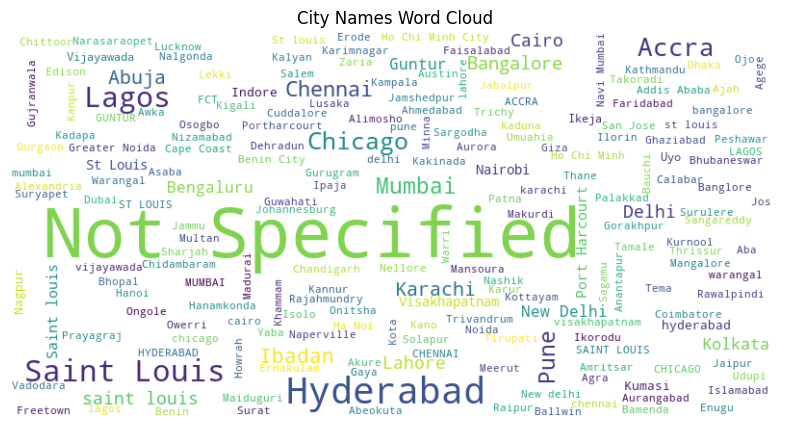

In [158]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud
city_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(df['city'].value_counts())

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(city_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('City Names Word Cloud')
plt.show()

* The above word cloud displays the cities with the highest number of users in the dataset, with the size of each city name corresponding to its user count.

### **7. Zip**

In [159]:
df.columns

Index(['PreferredSponsors', 'Gender', 'Country', 'Degree',
       'Sign Up Date and Time', 'city', 'zip', 'isFromSocialMedia',
       'Sign Up Month'],
      dtype='object')

In [160]:
df['zip'].head()

0          460103
1          686501
2             NaN
3             NaN
4    AT-1214-9090
Name: zip, dtype: object

In [161]:
df['zip'].value_counts()

zip
63108         629
233           444
0             286
60616         206
100001        141
             ... 
5450550850      1
503310          1
65809           1
501106          1
923             1
Name: count, Length: 7453, dtype: int64

In [162]:
# missing values in zip
missing_zip = df['zip'].isnull().sum()
percentage_missing_zip = (missing_zip / total_entries) * 100
# results
print('Total number of missing values in zip:', missing_zip)
print('Percentage of missing values in zip:', round(percentage_missing_zip, 2))

Total number of missing values in zip: 9544
Percentage of missing values in zip: 34.63


In [163]:
# Impute missing values in zip column with "Not Specified"
df['zip'].fillna('Not Specified', inplace=True)

# Verify the imputation
print('Total number of missing values in zip after imputation:', df['zip'].isnull().sum())

Total number of missing values in zip after imputation: 0


### **8. isFromSocialMedia**

In [164]:
df['isFromSocialMedia'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 27562 entries, 0 to 27561
Series name: isFromSocialMedia
Non-Null Count  Dtype 
--------------  ----- 
27553 non-null  object
dtypes: object(1)
memory usage: 215.5+ KB


In [165]:
df['isFromSocialMedia'].value_counts()

isFromSocialMedia
True     13811
False    13742
Name: count, dtype: int64

In [166]:
df['isFromSocialMedia'].replace({True: 'Yes', False: 'No'}, inplace=True)

# Verify the replacement
df['isFromSocialMedia'].value_counts()

isFromSocialMedia
Yes    13811
No     13742
Name: count, dtype: int64

In [169]:
# Calculate the percentage of each category in isFromSocialMedia column
social_media_counts = df['isFromSocialMedia'].value_counts(dropna=False)
social_media_percentages = (social_media_counts / total_entries) * 100

# Round the percentages to 1 decimal place
social_media_percentages_rounded = social_media_percentages.round(1)

# Create a bar plot using plotly
fig = px.bar(x=social_media_percentages_rounded.index.astype(str), y=social_media_percentages_rounded.values, 
             labels={'x': 'Signed Up via Social Media', 'y': 'Percentage (%)'}, 
             title='Percentage of Users Signed Up via Social Media',
             text=[f'{val}%' for val in social_media_percentages_rounded.values],
             color=social_media_percentages_rounded.index.astype(str))

# Layout for better visualization
fig.update_layout(xaxis_title='Signed Up via Social Media', yaxis_title='Percentage (%)', yaxis_range=[0, 100], legend_title_text='')
fig.show()

In [167]:
df.head()

,PreferredSponsors,Gender,Country,Degree,Sign Up Date and Time,city,zip,isFromSocialMedia,Sign Up Month
0,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Male,Nigeria,Undergraduate Student,2023-07-23 08:05:58.602000+00:00,Owerri,460103,No,2023-07
1,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Male,India,Undergraduate Student,2023-04-24 09:57:07.405000+00:00,kottayam,686501,No,2023-04
2,"[""GlobalShala"",""Illinois Institute of Technolo...",Not specified,India,Not Specified,2022-10-14 17:13:36.303000+00:00,Not Specified,Not Specified,No,2022-10
3,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Not specified,Albania,Not Specified,2023-06-06 12:29:01.772000+00:00,Not Specified,Not Specified,Yes,2023-06
4,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Female,Ghana,Not in Education,2023-06-15 16:31:42.719000+00:00,Kumasi,AT-1214-9090,No,2023-06


### **Note:**
 In the case of all above column, I chose to impute the missing values with `Not Specified`. This decision aligns with my belief that retaining the originality of the data and avoiding unnecessary manipulation is more important than attempting to fill in missing values. However, if the context or analysis requires it, I am open to applying imputation techniques to handle these missing values appropriately.

<h1 style="text-align: center;"><strong>Thank You! 😊</strong></h1>